In [2]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import neural_network as nn
import data_prep as dp

2023-04-03 19:14:46.625282: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#Loads arrays from external file
X = np.load('img.npy')
y = np.load('labels.npy')

In [4]:
numIMG = len(y)
numIMG

814255

In [5]:
#We will be using 85% of the data to train
import math

trainingIndex = math.ceil(0.85 * numIMG)
trainingIndex

692117

In [6]:
X = X.reshape(-1, 64, 64)

In [7]:
y = np.array(dp.convertLabel2Class(y))

In [ ]:
X = tf.keras.utils.normalize(X, axis=1)

In [ ]:
np.save('img', X)

In [8]:
#Splitting the data
X_train = X[:trainingIndex]
X_test = X[trainingIndex:]

y_train = y[:trainingIndex]
y_test = y[trainingIndex:]

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(47, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

In [ ]:
loss, acc = model.evaluate(X_test, y_test)

In [ ]:
model.save("model")

In [9]:
model = tf.keras.models.load_model("model")

2023-04-03 19:15:17.675927: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
prediction = model.predict([X_test])

3817/3817 [==============================] - 8s 2ms/step


In [11]:
type([y_test])

list

In [21]:
len(y_train)

692117

In [20]:
len(y_test)

122138

AI Prediction: 3
Actual Label: 3


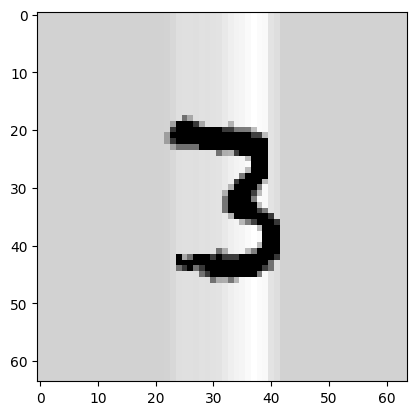

AI Prediction: d
Actual Label: d


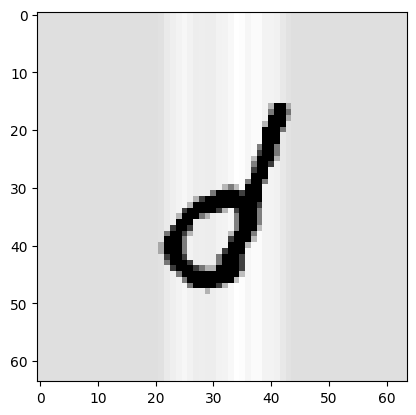

AI Prediction: N
Actual Label: U or u


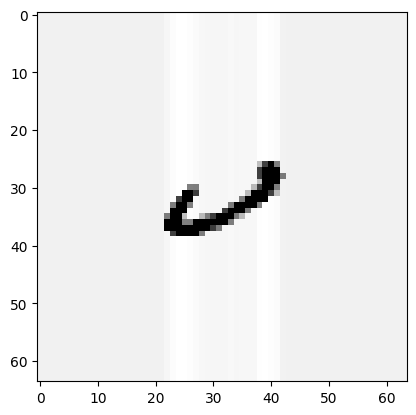

AI Prediction: 1
Actual Label: 1


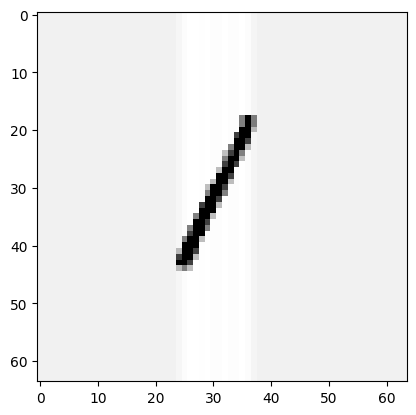

AI Prediction: 7
Actual Label: 7


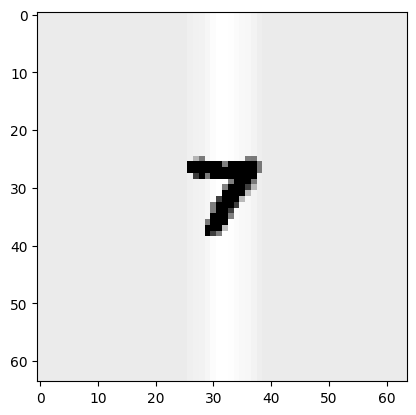

AI Prediction: 7
Actual Label: 7


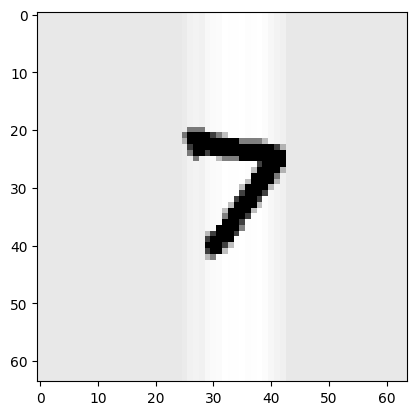

AI Prediction: 0
Actual Label: 0


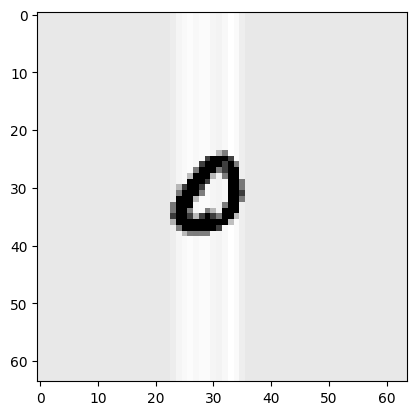

AI Prediction: 0
Actual Label: 0


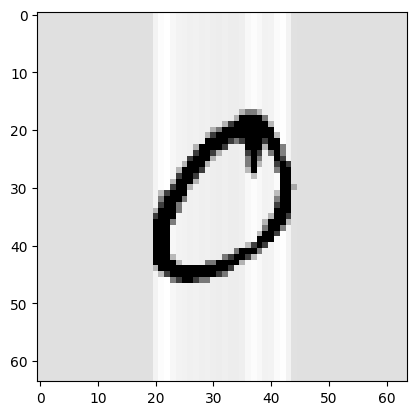

AI Prediction: 6
Actual Label: 6


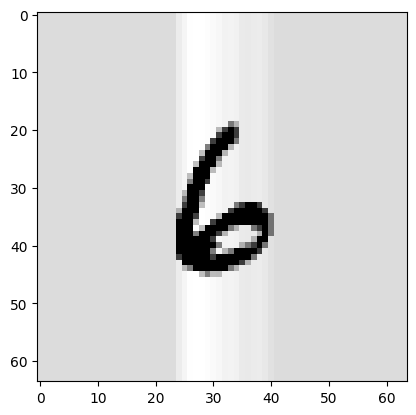

AI Prediction: 6
Actual Label: 6


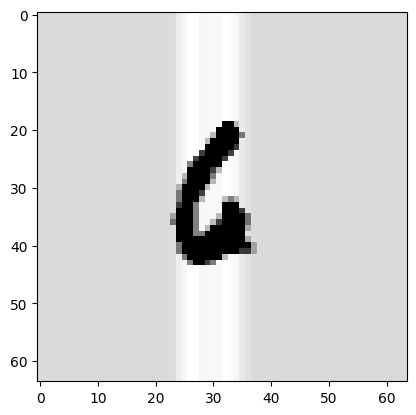

AI Prediction: 7
Actual Label: 7


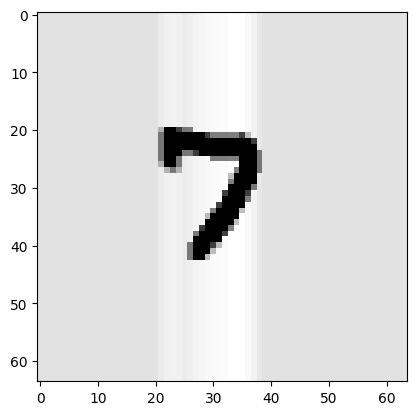

AI Prediction: 1
Actual Label: 1


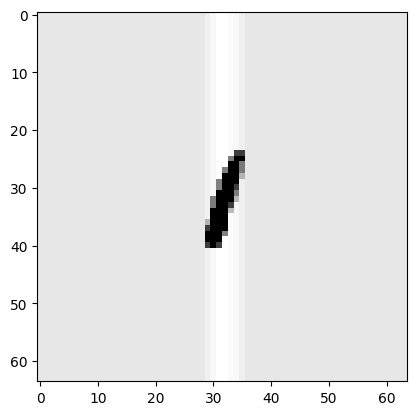

AI Prediction: t
Actual Label: t


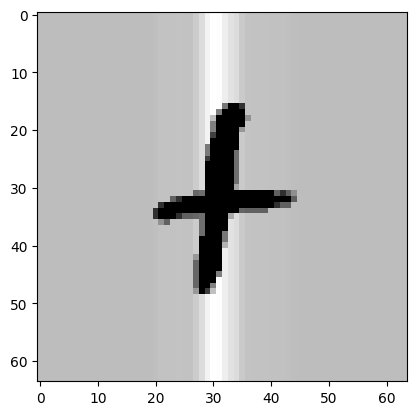

In [22]:
for n in range(1, len(y_test), 10000):
    print("AI Prediction:", dp.Ascii2Char(dp.getLabel(np.argmax(prediction[n]))))
    print("Actual Label:", dp.Ascii2Char(dp.getLabel(y_test[n])))
    plt.imshow(X_test[n], cmap='gray')
    plt.show()